In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Tratamento dos dados

In [20]:
df = pd.read_csv("calibration_data_3.tsv", delimiter="\t")
df.drop_duplicates(inplace=True)
df = df[df.temperature!=0]
df.head()

,time,temperature,resistance
0,0,43.1250,5222.9950
1,1,43.5625,5116.2516
2,2,43.8750,5038.5510
3,3,44.1875,4983.5410
4,4,44.5000,4880.1132


In [26]:
# df = df[df.time > 250]
df = df[df.time > 400]

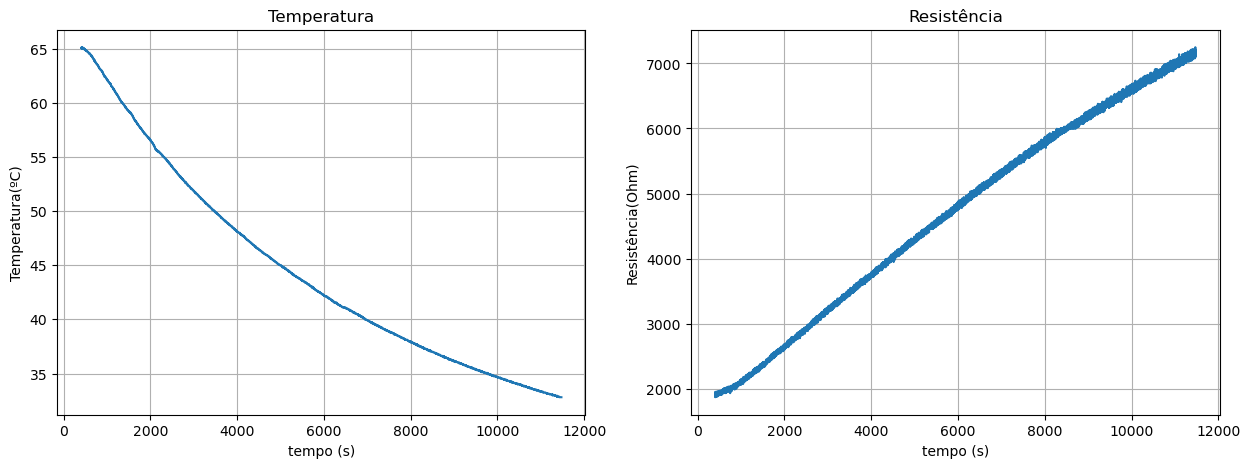

In [27]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.ylabel("Temperatura(ºC)")
plt.xlabel("tempo (s)")
plt.plot(df.time, df.temperature, '-')
plt.grid()
plt.title("Temperatura")

plt.subplot(1,2,2)
plt.ylabel("Resistência(Ohm)")
plt.plot(df.time, df.resistance, '-')
plt.title("Resistência")
plt.xlabel("tempo (s)")
plt.grid()
plt.show()

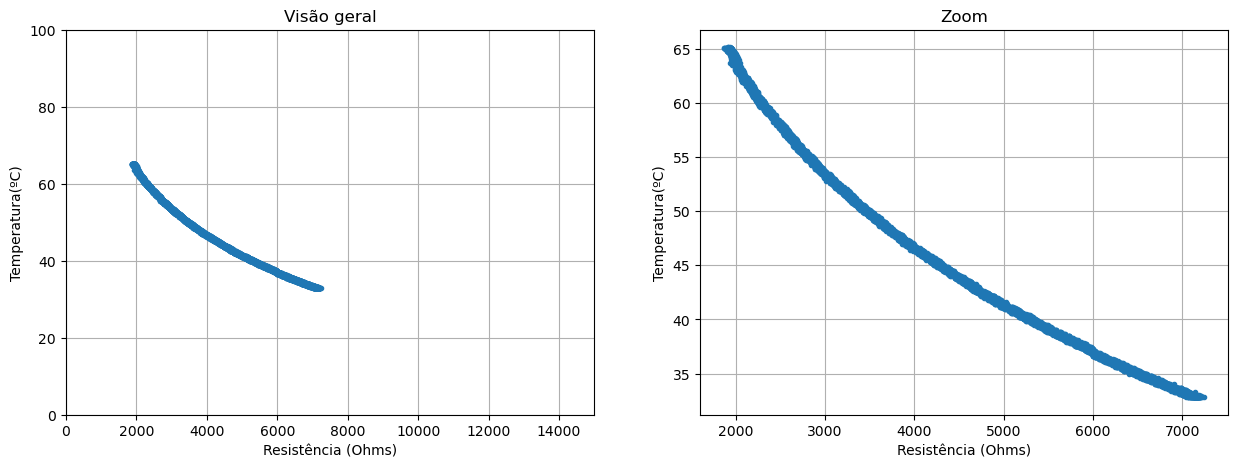

In [28]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.ylim(0,100)
plt.ylabel("Temperatura(ºC)")
plt.xlim(0, 15_000)
plt.xlabel("Resistência (Ohms)")
plt.plot(df.resistance, df.temperature, '.')
plt.grid()
plt.title("Visão geral")

plt.subplot(1,2,2)
plt.ylabel("Temperatura(ºC)")
plt.xlabel("Resistência (Ohms)")
plt.plot(df.resistance, df.temperature, '.')
plt.title("Zoom")
plt.grid()
plt.show()

# Modelo Linear

In [29]:
model = LinearRegression()

X = df.resistance.to_numpy().reshape((-1,1))
y = df.temperature.to_numpy()

model.fit(X,y)

print(f"T = {model.coef_[0]:.2e}*R + {model.intercept_:.2e}")

T = -5.71e-03*R + 7.13e+01


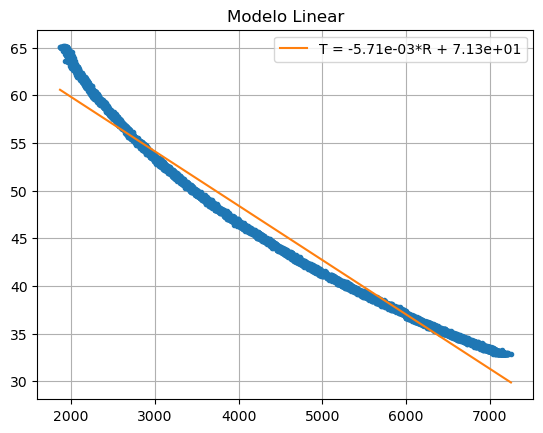

In [30]:
R = np.linspace(df.resistance.min(), df.resistance.max()).reshape((-1,1))

plt.plot(df.resistance, df.temperature, '.')
plt.plot(R, model.predict(R), label=f"T = {model.coef_[0]:.2e}*R + {model.intercept_:.2e}")
plt.title("Modelo Linear")
plt.legend()
plt.grid()
plt.show()

# Steinhart–Hart

In [31]:
X = [(np.log(r), np.log(r)**3) for r in df.resistance]
X = np.array(X)
X.shape

(10372, 2)

In [32]:
y = np.array(1/df.temperature.to_numpy())
y.shape

(10372,)

In [33]:
model_sh = LinearRegression()
model_sh.fit(X,y)

print(f"1/T = {model_sh.coef_[0]:.2e}*ln(R) + {model_sh.coef_[1]:.2e}*(ln(R))^3 + {model_sh.intercept_:.2e}")

1/T = -3.49e-02*ln(R) + 2.26e-04*(ln(R))^3 + 1.82e-01


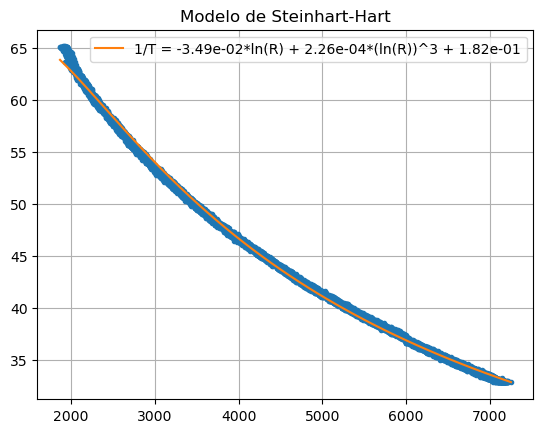

In [34]:
R = np.linspace(df.resistance.min(), df.resistance.max())
R_sh = np.array([(np.log(r), np.log(r)**3) for r in R])

plt.plot(df.resistance, df.temperature, '.')
plt.plot(R, 1/model_sh.predict(R_sh), label=f"1/T = {model_sh.coef_[0]:.2e}*ln(R) + {model_sh.coef_[1]:.2e}*(ln(R))^3 + {model_sh.intercept_:.2e}")
plt.title("Modelo de Steinhart-Hart")
plt.legend()
plt.grid()
plt.show()

# Comparação

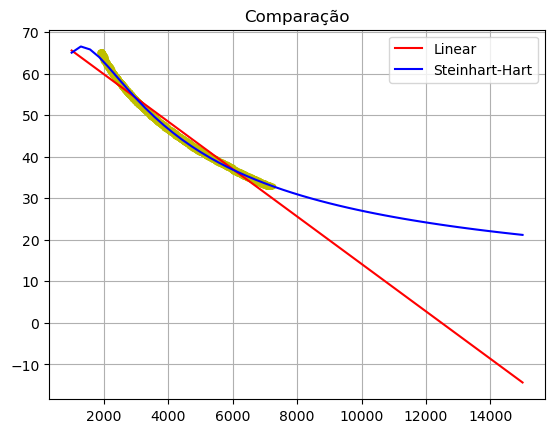

In [35]:
# R = np.linspace(df.resistance.min(), df.resistance.max())
R = np.linspace(1_000,15_000)
R_sh = np.array([(np.log(r), np.log(r)**3) for r in R])

plt.plot(df.resistance, df.temperature, '.y')
plt.plot(R, model.predict(R.reshape((-1,1))), '-r', label="Linear")
plt.plot(R, 1/model_sh.predict(R_sh), '-b', label="Steinhart-Hart")
plt.title("Comparação")
plt.legend()
plt.grid()
plt.show()

# Exportando os parâmetros

In [36]:
from datetime import datetime

datetime.now().isoformat()

'2025-10-12T21:01:02.285972'

In [37]:
params = {
    "linear_model":{
        "coef": model.coef_[0],
        "intercept": model.intercept_,
    },
    "steinhart-hart":{
        "A":model_sh.intercept_,
        "B":model_sh.coef_[0],
        "C":model_sh.coef_[1]
    },
    "metadata":{
        "training_data_limits":{
            "Tmax": df.temperature.max(),
            "Tmin": df.temperature.min(),
            "Rmax": df.resistance.max(),
            "Rmin": df.resistance.min()
        }
    }
}

In [38]:
from datetime import datetime
import json

# with open(f"thermistor_params_{datetime.now().isoformat()}.json", "wt") as file:
with open(f"thermistor_params.json", "wt") as file:
    json.dump(params, file)    